# City Bike Share Analysis



# # Project Summary

###Problem Statement

###What is the likelihood that a Bike Share program will succeed in the City of Atlanta? 
By using bike share data from other US cities, I want to be able to analyze the popularity and trends of bike shares amongst females and males of different ages. 



## Description of Data and Collection method

CSV Files of Open Dataset for:
*Chicago Q1 & Q2 2015
*Boston 2011 to 2013
*NYC Jan 2015 to Jul 2015

Files Contain:
Gender
Year of Birth
Trip date and time
Duration of Trip

###Transformation and data aggregation description:
I loaded data for Chicago and Boston into a single table (via MS Sql Server Express), where the total volume is ~1.2 M records.In order to conform data to a standard gender code, I updated the gender for each record to "Female" and "Male" values.
The data was then aggregrated by sum of duration , grouped by city,gender and age. The aggregrated data was outputted to a CSV file for use in cross validation and model use.


In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn import cross_validation
from sklearn.metrics import mean_squared_error
from sklearn import grid_search
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

%matplotlib inline



In [47]:
#dsCity= pd.read_csv('https://raw.githubusercontent.com/Sw3m/Data_Science_GA_Project_15/master/Datasets/CityBikeShareExtract.csv')
dsCity= pd.read_csv('C:/Users/sawadhawan/Documents/GitHub/Data_Science_GA_Project_15/Datasets/CityBikeShareExtract.csv')

In [48]:
#dsBike= pd.read_csv('https://raw.githubusercontent.com/Sw3m/Data_Science_GA_Project_15/master/Datasets/ALLBikeShareExtract.csv')
dsBike= pd.read_csv('C:/Users/sawadhawan/Documents/GitHub/Data_Science_GA_Project_15/Datasets/ALLBikeShareExtract.csv')

In [49]:
dsCity.head()

,City,NumRecords,Gender,Age,AgeRange,YearOfBirth,TotalDur_sec,AvgDur_sec
0,Boston,5,Female,83,75 Years or older,1932,4182,836
1,Boston,2,Female,77,75 Years or older,1938,1457,728
2,Boston,11,Male,77,75 Years or older,1938,7645,695
3,Boston,11,Male,76,75 Years or older,1939,4956,450
4,Boston,16,Male,75,75 Years or older,1940,10131,633


In [50]:
len(dsCity.index)

393

In [51]:
dsBoston = dsCity[dsCity['City']=='Boston']
dsChicago = dsCity[dsCity['City']=='Chicago']
dsNYC= dsCity[dsCity['City']=='NYC']


In [52]:
dsCity['Gender']=dsCity.Gender.map({'Female':0,'Male':1})
dsCity['City']=dsCity.City.map({'Boston':0,'Chicago':1,'NYC':2})
dsCity.head()

,City,NumRecords,Gender,Age,AgeRange,YearOfBirth,TotalDur_sec,AvgDur_sec
0,0,5,0,83,75 Years or older,1932,4182,836
1,0,2,0,77,75 Years or older,1938,1457,728
2,0,11,1,77,75 Years or older,1938,7645,695
3,0,11,1,76,75 Years or older,1939,4956,450
4,0,16,1,75,75 Years or older,1940,10131,633


In [53]:
#X=dsCity[['TotalDur_sec','Gender','NumRecords']]

#Y= dsCity[['Age']]

In [54]:
#X_train, X_test, y_train, y_test = cross_validation.train_test_split(X,Y,test_size=0.2,random_state=1)

In [55]:
dsBike['Gender']=dsBike.Gender.map({'Female':0,'Male':1})
dsBike.head()

,NumRec,Gender,Age,AgeRange,YearOfBirth,TotalDur_sec,AvgDur_sec
0,1,1,130,75 Years or older,1885,357,357
1,1,1,117,75 Years or older,1898,766,766
2,155,1,116,75 Years or older,1899,188945,1219
3,13,0,115,75 Years or older,1900,8976,690
4,806,1,115,75 Years or older,1900,867036,1075


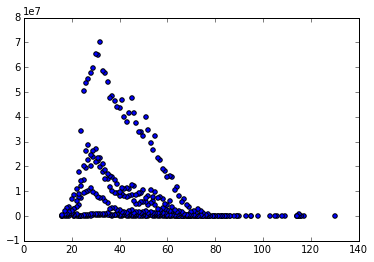

In [56]:
plt.scatter(dsCity['Age'],dsCity['TotalDur_sec'])

In [57]:
Xbike=dsBike[['TotalDur_sec','Gender']]

Ybike= dsBike[['Age']]

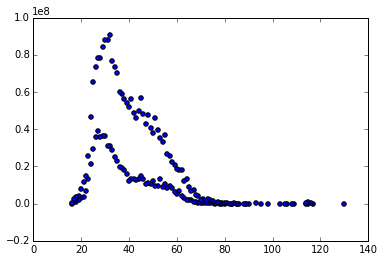

In [58]:
plt.scatter(dsBike['Age'],dsBike['TotalDur_sec'])

### Perform Linear Regression

In [59]:
#Linear Reg at City level dataset/dataframe
#linear_rgr =linear_model.LinearRegression()
#linear_rgr.fit(X_train,y_train)

#print("coefficient {}".format(linear_rgr.coef_))
#print("intercept {}".format(linear_rgr.intercept_))
#linear_MSE = mean_squared_error(y_test, linear_rgr.predict(X_test))
#print('Mean squared error for liner regression by cities: {}'.format(linear_MSE))


In [60]:
X_trainb, X_testb, y_trainb, y_testb = cross_validation.train_test_split(Xbike,Ybike,test_size=0.2,random_state=1)

linear_rgrB =linear_model.LinearRegression()
linear_rgrB.fit(X_trainb,y_trainb)

print("coefficient {}".format(linear_rgrB.coef_))
print("intercept {}".format(linear_rgrB.intercept_))
linear_MSEb = mean_squared_error(y_testb, linear_rgrB.predict(X_testb))
print('Mean squared error for liner regression: {}'.format(linear_MSEb))

coefficient [[ -7.41663642e-07   1.92786243e+01]]
intercept [ 60.20079475]
Mean squared error for liner regression: 414.517814479


In [61]:
import statsmodels.formula.api as sm

model = sm.ols(formula='Age ~ TotalDur_sec', data=dsBike)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    Age   R-squared:                       0.289
Model:                            OLS   Adj. R-squared:                  0.284
Method:                 Least Squares   F-statistic:                     62.93
Date:                Wed, 11 Nov 2015   Prob (F-statistic):           3.99e-13
Time:                        12:24:36   Log-Likelihood:                -709.10
No. Observations:                 157   AIC:                             1422.
Df Residuals:                     155   BIC:                             1428.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------
Intercept       67.7846      2.261     29.975   

###Perform Logistic Regression

### Perform KNN

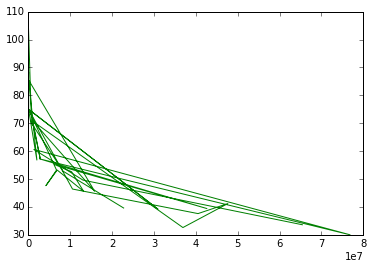

In [62]:
from sklearn import neighbors
knn = neighbors.KNeighborsRegressor()
knn.fit(X_trainb,y_trainb)
knn_b = knn.predict(X_testb)

#y_ = knn.fit(TV_train.reshape(len(TV_train),1),Sales_train).predict(TV_test.reshape(len(TV_test),1))

#plt.scatter(X_testb.values,y_testb,c='b', label='data')
plt.plot(X_testb,knn_b,c='g',label='prediction')

In [63]:
temp = pd.get_dummies(dsBike, columns = ['AgeRange'])

In [64]:
temp.head(20)

,NumRec,Gender,Age,YearOfBirth,TotalDur_sec,AvgDur_sec,AgeRange_12-17 years old,AgeRange_18-24 years old,AgeRange_25-34 years old,AgeRange_35-44 years old,AgeRange_45-54 years old,AgeRange_55-64 years old,AgeRange_65-74 years old,AgeRange_75 Years or older
0,1,1,130,1885,357,357,0,0,0,0,0,0,0,1
1,1,1,117,1898,766,766,0,0,0,0,0,0,0,1
2,155,1,116,1899,188945,1219,0,0,0,0,0,0,0,1
3,13,0,115,1900,8976,690,0,0,0,0,0,0,0,1
4,806,1,115,1900,867036,1075,0,0,0,0,0,0,0,1
5,3,0,114,1901,27896,9298,0,0,0,0,0,0,0,1
6,164,1,114,1901,159245,971,0,0,0,0,0,0,0,1
7,63,1,109,1906,48103,763,0,0,0,0,0,0,0,1
8,7,1,108,1907,5645,806,0,0,0,0,0,0,0,1
9,6,1,106,1909,6196,1032,0,0,0,0,0,0,0,1


In [65]:
list(temp)

['NumRec',
 'Gender',
 'Age',
 'YearOfBirth',
 'TotalDur_sec',
 'AvgDur_sec',
 'AgeRange_12-17 years old',
 'AgeRange_18-24 years old',
 'AgeRange_25-34 years old',
 'AgeRange_35-44 years old',
 'AgeRange_45-54 years old',
 'AgeRange_55-64 years old',
 'AgeRange_65-74 years old',
 'AgeRange_75 Years or older']

In [66]:
Xtemp= temp[['AgeRange_12-17 years old',
 'AgeRange_18-24 years old',
 'AgeRange_25-34 years old',
 'AgeRange_35-44 years old',
 'AgeRange_45-54 years old',
 'AgeRange_55-64 years old',
 'AgeRange_65-74 years old',
 'AgeRange_75 Years or older',
 'Gender']]
ytemp=temp[['TotalDur_sec']]

In [67]:
X_train, X_test, y_train, y_test = cross_validation.train_test_split(Xtemp, ytemp, random_state=1)

In [68]:
y_train.shape

(117, 1)

In [69]:
X_test.shape

(40, 9)

In [70]:
#Try a Logistic regression.
from sklearn.linear_model import LogisticRegression

lr_rgr = LogisticRegression()
lr_rgr.fit(X_train, y_train['TotalDur_sec'])
y_pred_lr = lr_rgr.predict(X_test)
print(accuracy_score(y_test,y_pred_lr))

0.0


In [72]:
#try a Decision Tree Classifier and find feature importance

ctree = tree.DecisionTreeClassifier()
ctree = ctree.fit(X_train, y_train)
y_pred=ctree.predict(X_test)
print("Training Score: {}".format(ctree.score(X_train, y_train)))
print("Test Score: {}".format(ctree.score(X_test, y_test)))

Training Score: 0.136752136752
Test Score: 0.0


In [73]:
importances = ctree.feature_importances_
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(9):
    print("{} feature {}, {}, ({})".format(f + 1, indices[f], X_test.columns[f], importances[indices[f]]))

Feature ranking:
1 feature 7, AgeRange_12-17 years old, (0.133333333333)
2 feature 5, AgeRange_18-24 years old, (0.133333333333)
3 feature 4, AgeRange_25-34 years old, (0.133333333333)
4 feature 3, AgeRange_35-44 years old, (0.133333333333)
5 feature 2, AgeRange_45-54 years old, (0.133333333333)
6 feature 1, AgeRange_55-64 years old, (0.133333333333)
7 feature 0, AgeRange_65-74 years old, (0.133333333333)
8 feature 8, AgeRange_75 Years or older, (0.0666666666667)
9 feature 6, Gender, (0.0)


In [75]:
#features = [
#'AgeRange_12-17 years old',
# 'AgeRange_18-24 years old',
# 'AgeRange_25-34 years old',
# 'AgeRange_35-44 years old',
# 'AgeRange_45-54 years old',
# 'AgeRange_55-64 years old',
# 'AgeRange_65-74 years old',
# 'AgeRange_75 Years or older'
#]
rgr = RandomForestClassifier()
rgr.fit(X_train,y_train['TotalDur_sec'])
#y_pred = rgr.predict(X_test)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

C:\Anaconda\lib\site-packages\sklearn\utils\validation.py:449: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
